In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [13]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [14]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [15]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [16]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [17]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation= 'softmax'))
adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 12s 26ms/step - loss: 6.8407 - accuracy: 0.0626
Epoch 2/100
377/377 [==============================] - 9s 24ms/step - loss: 5.7812 - accuracy: 0.1057
Epoch 3/100
377/377 [==============================] - 9s 23ms/step - loss: 4.8803 - accuracy: 0.1633
Epoch 4/100
377/377 [==============================] - 9s 23ms/step - loss: 3.9383 - accuracy: 0.2513
Epoch 5/100
377/377 [==============================] - 9s 23ms/step - loss: 3.1224 - accuracy: 0.3483
Epoch 6/100
377/377 [==============================] - 9s 23ms/step - loss: 2.3983 - accuracy: 0.4687
Epoch 7/100
377/377 [==============================] - 9s 24ms/step - loss: 1.9784 - accuracy: 0.5438
Epoch 8/100
377/377 [==============================] - 9s 24ms/step - loss: 1.5601 - accuracy: 0.6283
Epoch 9/100
377/377 [==============================] - 10s 25ms/step - loss: 1.3001 - accuracy: 0.6951
Epoch 10/100
377/377 [==============================] - 10s 27ms/step - loss: 1.

377/377 [==============================] - 10s 28ms/step - loss: 0.7160 - accuracy: 0.8051
Epoch 81/100
377/377 [==============================] - 11s 28ms/step - loss: 0.6993 - accuracy: 0.8079
Epoch 82/100
377/377 [==============================] - 8s 22ms/step - loss: 0.7646 - accuracy: 0.7901
Epoch 83/100
377/377 [==============================] - 9s 25ms/step - loss: 0.7446 - accuracy: 0.7969
Epoch 84/100
377/377 [==============================] - 10s 28ms/step - loss: 0.8519 - accuracy: 0.7800
Epoch 85/100
377/377 [==============================] - 10s 26ms/step - loss: 0.7556 - accuracy: 0.7947
Epoch 86/100
377/377 [==============================] - 9s 25ms/step - loss: 0.7358 - accuracy: 0.8016
Epoch 87/100
377/377 [==============================] - 9s 24ms/step - loss: 0.6983 - accuracy: 0.8097
Epoch 88/100
377/377 [==============================] - 10s 26ms/step - loss: 0.6639 - accuracy: 0.8135
Epoch 89/100
377/377 [==============================] - 10s 25ms/step - loss: 0.6

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

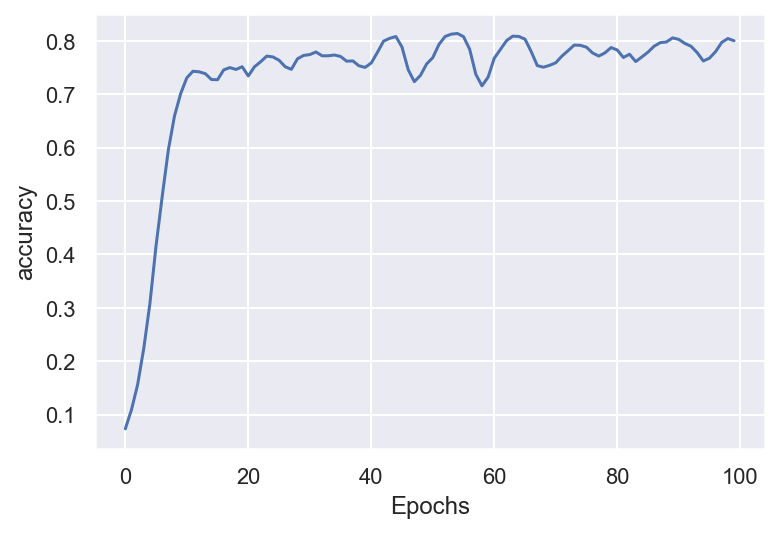

In [11]:
plot_graphs(history, 'accuracy')

In [12]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this little high high high rocky axe down the sea died and loud and at the sea is more near town so sweet town of beer me grief and tears no darlin gone alas is the more down and gone and her love me and pride says ill excise and magic are gone and my eyes twinkle bright as call sun for all town in the magic i suppose more my bride tears no more countin gone i is gone and right sea getting me town and the sea gone town is play cares gone in someone i wish i was
